### First,lets load the dataset using pandas

In [42]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 


In [43]:
dataframe=pd.read_csv('car.csv')

### Now let's analayze the dataframe,its shape,missing values in each columns,median,mean values of each dataframe and so on

In [44]:
print(dataframe.shape)
print(dataframe.columns)
dataframe.head()

(8128, 12)
Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage(km/ltr/kg)', 'engine', 'max_power',
       'seats'],
      dtype='object')


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0


In [45]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8128 non-null   object 
 1   year                8128 non-null   int64  
 2   selling_price       8128 non-null   int64  
 3   km_driven           8128 non-null   int64  
 4   fuel                8128 non-null   object 
 5   seller_type         8128 non-null   object 
 6   transmission        8128 non-null   object 
 7   owner               8128 non-null   object 
 8   mileage(km/ltr/kg)  7907 non-null   float64
 9   engine              7907 non-null   float64
 10  max_power           7913 non-null   object 
 11  seats               7907 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 762.1+ KB


In [46]:
dataframe.describe()

,year,selling_price,km_driven,mileage(km/ltr/kg),engine,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000,7907.000000,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,19.418783,1458.625016,5.416719
std,4.044249,8.062534e+05,5.655055e+04,4.037145,503.916303,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,16.780000,1197.000000,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,19.300000,1248.000000,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,22.320000,1582.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,14.000000


In [47]:
dataframe.isnull().sum()

name                    0
year                    0
selling_price           0
km_driven               0
fuel                    0
seller_type             0
transmission            0
owner                   0
mileage(km/ltr/kg)    221
engine                221
max_power             215
seats                 221
dtype: int64

### Lets fill the missing values.


In [48]:
missing_values = dataframe.isnull().sum()
missing_values = missing_values[missing_values > 0]  
print(f"Missing_values:{missing_values.keys()}") 
for i  in missing_values.keys():
    print(f'Skewness of {i} is {dataframe[i].skew()}') 


Missing_values:Index(['mileage(km/ltr/kg)', 'engine', 'max_power', 'seats'], dtype='object')
Skewness of mileage(km/ltr/kg) is -0.14266745404242617
Skewness of engine is 1.1352691298499176


TypeError: could not convert string to float: ' '

In [ ]:
dataframe['max_power'].unique()

array(['74', '103.52', '78', '90', '88.2', '81.86', '57.5', '37', '67.1',
       '68.1', '108.45', '60', '73.9', nan, '67', '82', '88.5', '46.3',
       '88.73', '64.1', '98.6', '88.8', '83.81', '83.1', '47.3', '73.8',
       '34.2', '35', '81.83', '40.3', '121.3', '138.03', '160.77',
       '117.3', '116.3', '83.14', '67.05', '168.5', '100', '120.7',
       '98.63', '175.56', '103.25', '171.5', '100.6', '174.33', '187.74',
       '170', '78.9', '88.76', '86.8', '108.495', '108.62', '93.7',
       '103.6', '98.59', '189', '67.04', '68.05', '58.2', '82.85', '81.8',
       '73', '120', '94.68', '160', '65', '155', '69.01', '126.32',
       '138.1', '83.8', '126.2', '98.96', '62.1', '86.7', '188', '214.56',
       '177', '280', '148.31', '254.79', '190', '177.46', '204', '141',
       '117.6', '241.4', '282', '150', '147.5', '108.5', '103.5', '183',
       '181.04', '157.7', '164.7', '91.1', '400', '68', '75', '85.8',
       '87.2', '53', '118', '103.2', '83', '84', '58.16', '147.94',
   

In [ ]:
print(dataframe['max_power'].isnull().sum())
print((dataframe['max_power'].str.strip()=='').sum())


215
1


In [ ]:
#now lets replace empty strins with NaN
dataframe['max_power']=dataframe['max_power'].replace(' ',np.nan)


#### Because of empty space max_power column was treated as object but values in it are not categorical or object type.so lets convert it to numerical datatype now as we already replace empty values with NaN 

In [ ]:
dataframe['max_power'] =dataframe['max_power'].astype(float)

In [ ]:
dataframe['max_power'].dtype

dtype('float64')

#### Now lets look after all missing object datatype columns before replacing those values to find suitable values to replace them


In [ ]:
for i in dataframe.columns:
   
    print(f'{i} : ({dataframe[i].dtype}) and their respective missing values are ({dataframe[i].isnull().sum()})')

name : (object) and their respective missing values are (0)
year : (int64) and their respective missing values are (0)
selling_price : (int64) and their respective missing values are (0)
km_driven : (int64) and their respective missing values are (0)
fuel : (object) and their respective missing values are (0)
seller_type : (object) and their respective missing values are (0)
transmission : (object) and their respective missing values are (0)
owner : (object) and their respective missing values are (0)
mileage(km/ltr/kg) : (float64) and their respective missing values are (221)
engine : (float64) and their respective missing values are (221)
max_power : (float64) and their respective missing values are (216)
seats : (float64) and their respective missing values are (221)


### Oher things looks fine ,now lets check their skewness to fill their values

In [ ]:
for i in dataframe.columns:
    if dataframe[i].isnull().sum()>0 :
        print(f'  column ({i}) and their respective skewness is :{dataframe[i].skew()}')

  column (mileage(km/ltr/kg)) and their respective skewness is :-0.14266745404242617
  column (engine) and their respective skewness is :1.1352691298499176
  column (max_power) and their respective skewness is :1.6212607481144414
  column (seats) and their respective skewness is :1.969914080776506


In [ ]:
dataframe['mileage(km/ltr/kg)'].fillna(dataframe['mileage(km/ltr/kg)'].mean(),inplace=True)
dataframe['engine'].fillna(dataframe['engine'].median(),inplace=True)
dataframe['max_power'].fillna(dataframe['max_power'].median(),inplace=True)
dataframe['seats'].fillna(dataframe['seats'].median(),inplace=True)



C:\Users\Asus\AppData\Local\Temp\ipykernel_12292\276422383.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataframe['mileage(km/ltr/kg)'].fillna(dataframe['mileage(km/ltr/kg)'].mean(),inplace=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_12292\276422383.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting va

In [ ]:
dataframe.isnull().sum()

name                  0
year                  0
selling_price         0
km_driven             0
fuel                  0
seller_type           0
transmission          0
owner                 0
mileage(km/ltr/kg)    0
engine                0
max_power             0
seats                 0
dtype: int64

# Now,our data is ready for Data Analysis.

### First lets see univariate anlaysis


In [ ]:
# first seperate numerical and categorical columns

numerical_columns =dataframe.select_dtypes(include=['int64','float64'])
print(numerical_columns.columns)

categorical_columns =dataframe.select_dtypes(include=['object'])
print(categorical_columns.columns)

Index(['year', 'selling_price', 'km_driven', 'mileage(km/ltr/kg)', 'engine',
       'max_power', 'seats'],
      dtype='object')
Index(['name', 'fuel', 'seller_type', 'transmission', 'owner'], dtype='object')


##### First numerical columns 

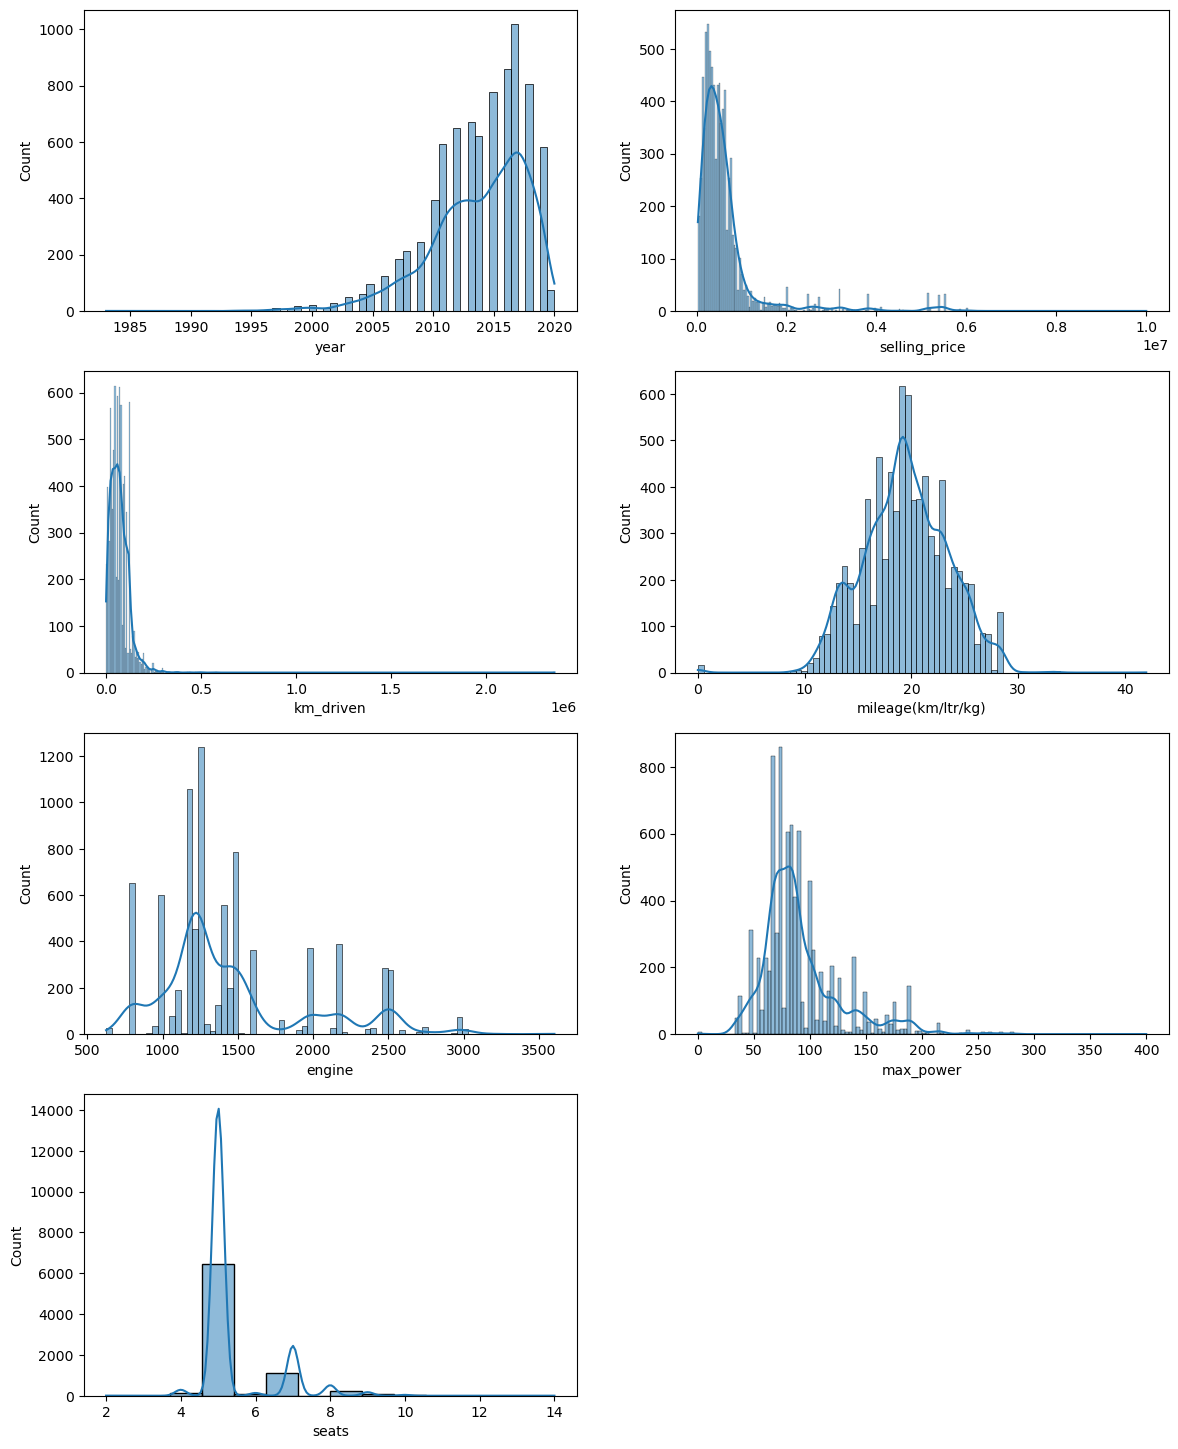

In [ ]:
plt.figure(figsize=(14,18))
for i,feature in enumerate(numerical_columns.columns):
    plt.subplot(4,2,i+1)
    sns.histplot(data=dataframe,x=feature,kde=True)

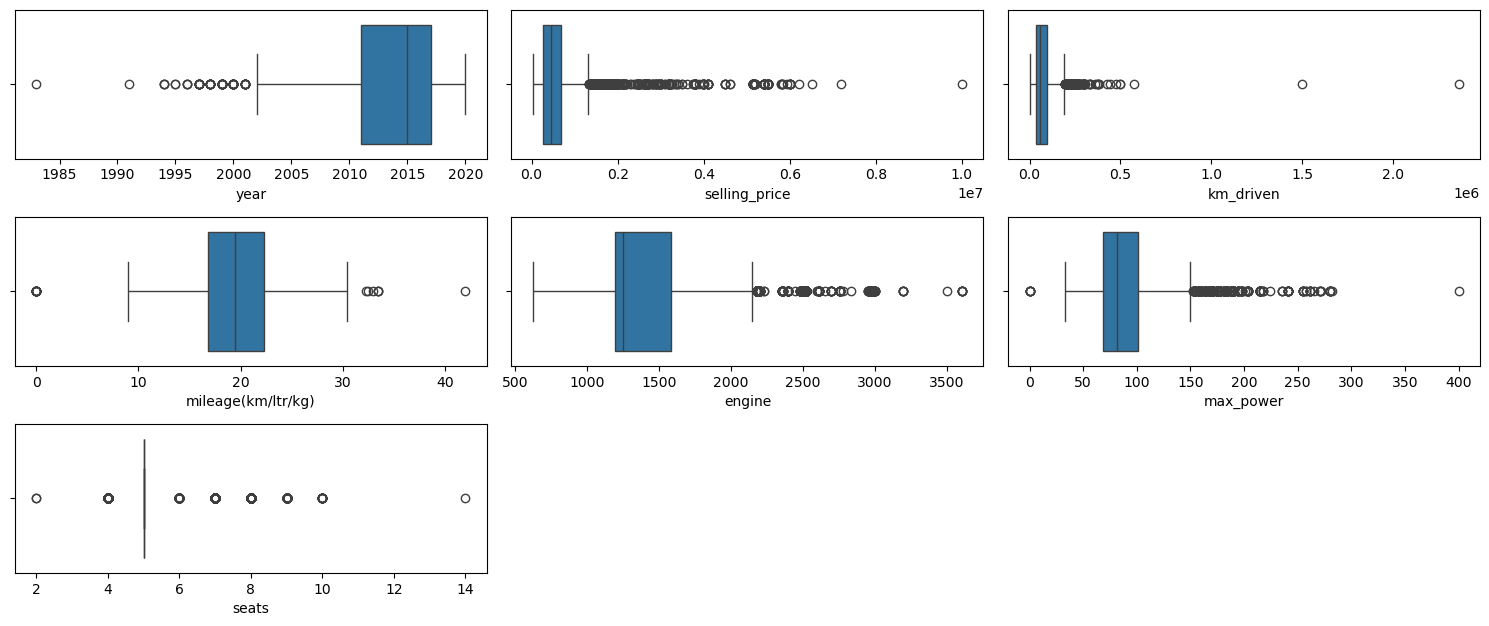

In [ ]:
## Now lets see box plot 
plt.figure(figsize=(15,8))
for i,feature in enumerate(numerical_columns.columns):
    plt.subplot(4,3,i+1)
    sns.boxplot(data=dataframe,x=feature)
    plt.tight_layout()

##### There are so many outliers on all columns which have no use/advantage in training the model.

### Now perform Uni Variate Analysis on Categorical dataset

- lets do count plot 


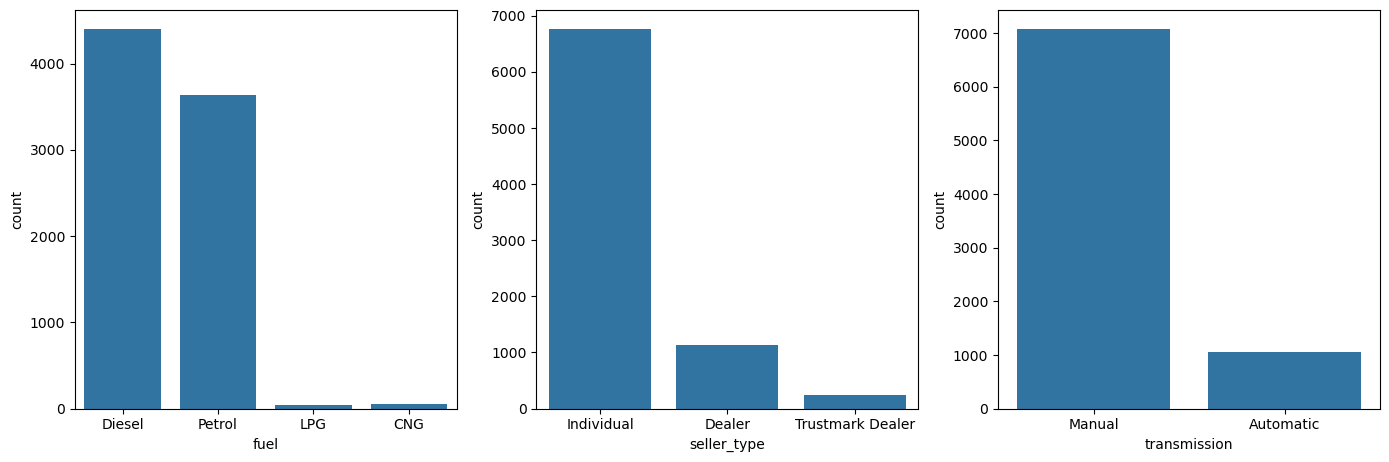

In [ ]:
plt.figure(figsize=(14,18))
cat_cols= [feature for feature in categorical_columns if feature != 'name' and feature != 'owner']
for i,feature in enumerate(cat_cols):
    if feature != 'name':
        plt.subplot(4,3,i+1)
        sns.countplot(data=dataframe,x=feature)
        
      
        plt.tight_layout()

In [ ]:
categorical_columns['name'].nunique()


2058

<Axes: xlabel='owner', ylabel='count'>

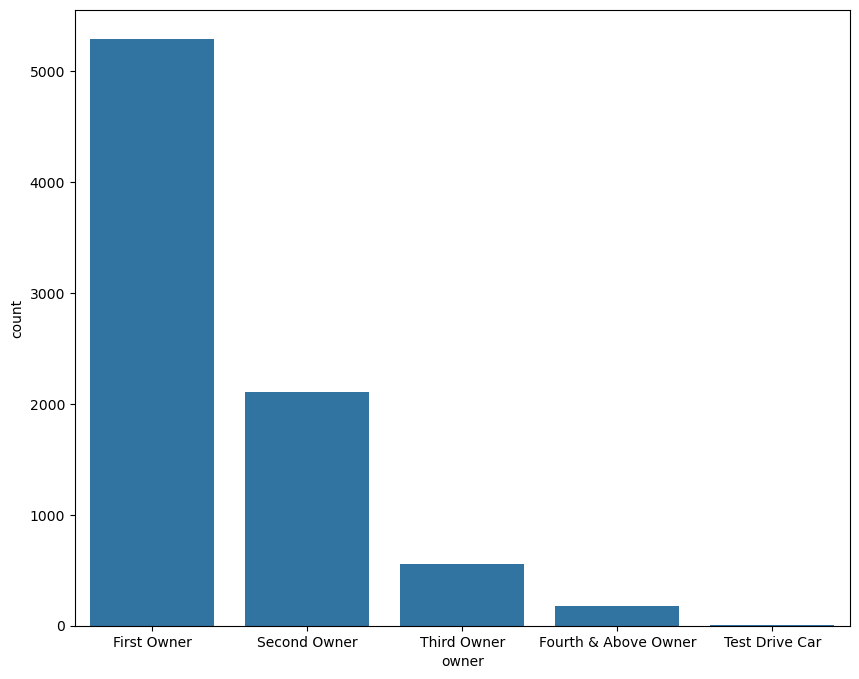

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(data=dataframe,x='owner')

### As we see,we saw countplot of other columns but for name columns as there are huge numbers of unique values in it,it is difficult to plot them in bargraph as above.So lets only see countplot for 10  most famous values of name column for their analysis 

<Axes: title={'center': 'Top 10 Car Names'}, xlabel='count', ylabel='name'>

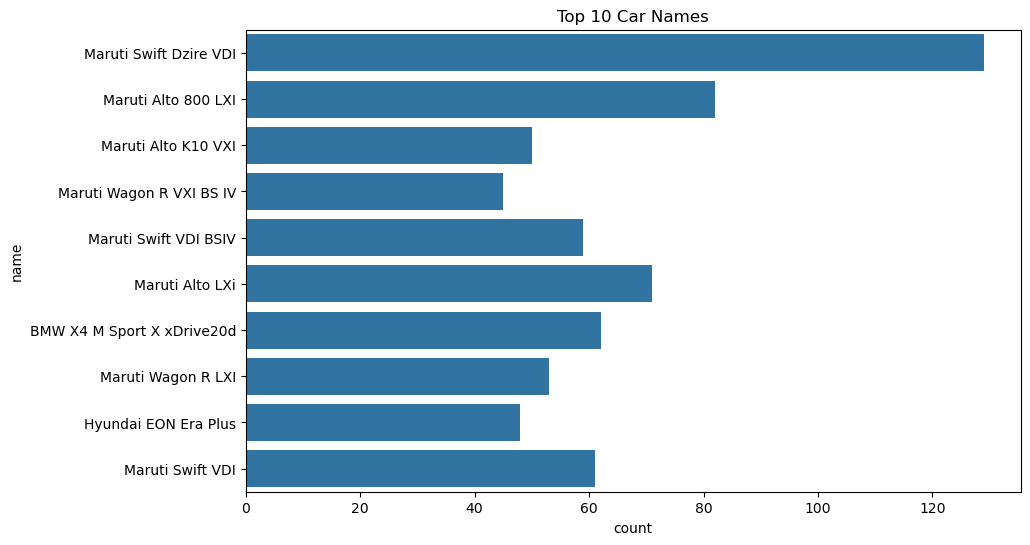

In [54]:
top_names =dataframe['name'].value_counts().nlargest(10).index
names_to_plot =dataframe[dataframe['name'].isin(top_names)]
plt.figure(figsize=(10,6))
plt.title("Top 10 Car Names")
sns.countplot(data=names_to_plot,y='name')



### Lets check the distibution of dataset in percentage using piechart

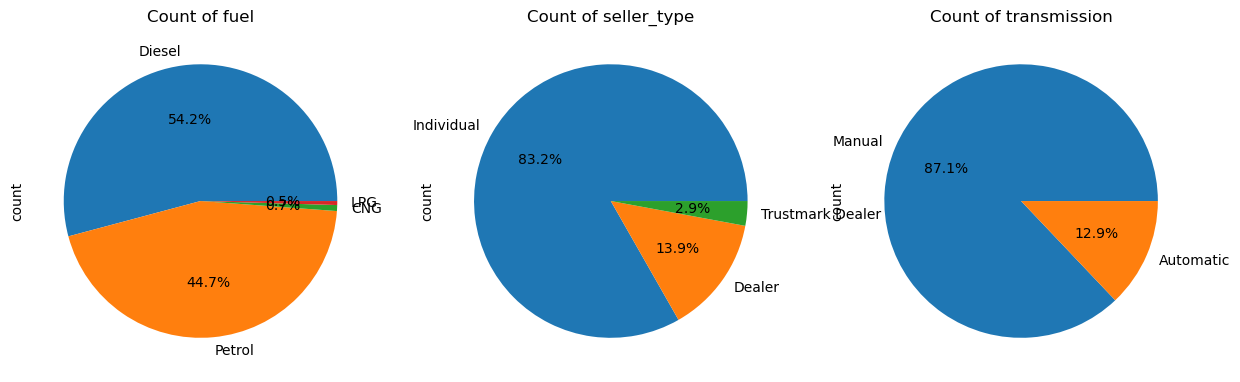

In [41]:
plt.figure(figsize=(15,5))
for i,feature in enumerate(cat_cols):
   
        plt.subplot(1,3,i+1)
        dataframe[feature].value_counts().plot(kind='pie',autopct='%1.1f%%')
        plt.title(f'Count of {feature}')
    


<Axes: ylabel='count'>

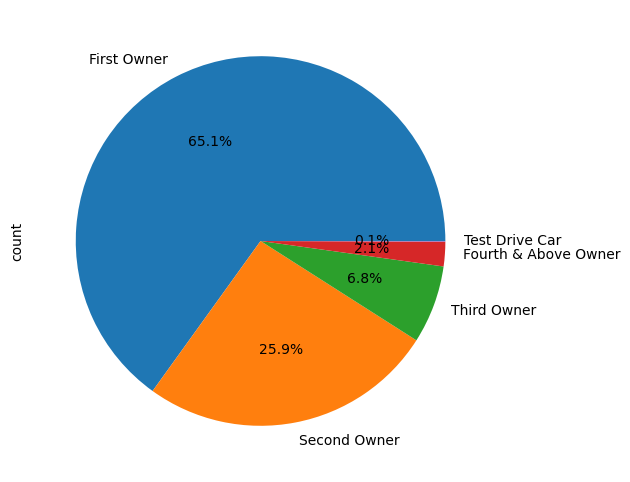

In [65]:
plt.figure(figsize=(10,6))
dataframe['owner'].value_counts().plot(kind='pie',autopct='%1.1f%%')


<Axes: ylabel='count'>

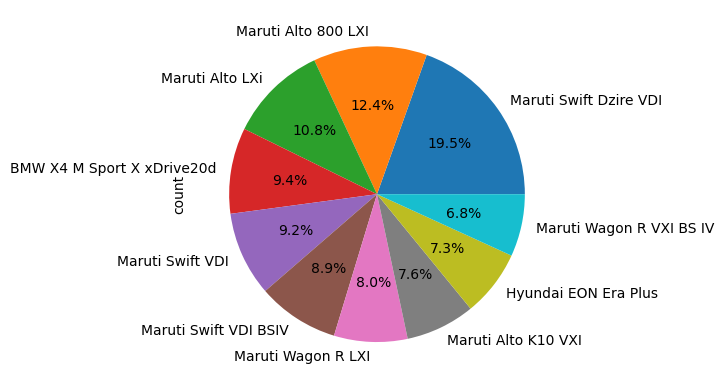

In [64]:
names_to_plot['name'].value_counts().plot(kind='pie',autopct='%1.1f%%')

### Now let's perform bivariate/multivariate analysis 

- lets perform scatterplot analysis

In [66]:
dataframe.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage(km/ltr/kg)', 'engine', 'max_power',
       'seats'],
      dtype='object')

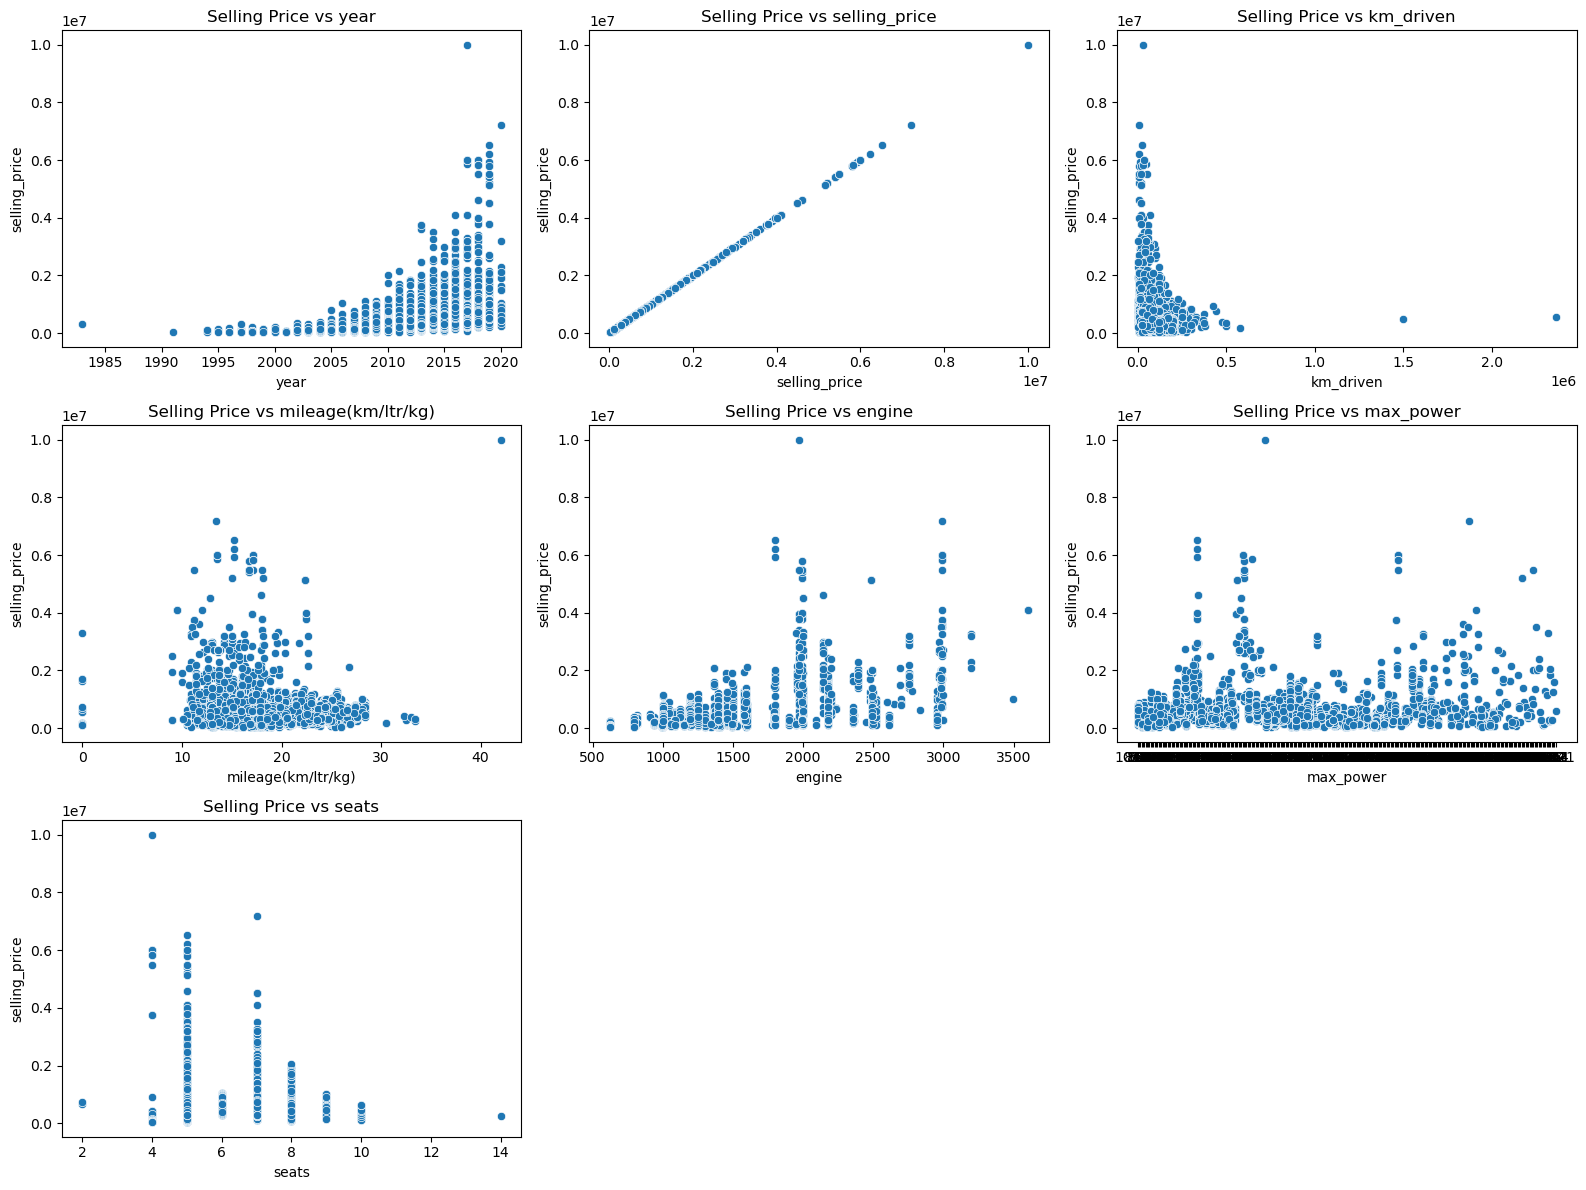

In [80]:
plt.figure(figsize=(16,12))
for i,feature in  enumerate(numerical_columns):
    plt.subplot(3,3,i+1)
    sns.scatterplot(data=dataframe,x=feature,y='selling_price')
    plt.title(f"Selling Price vs {feature}")
plt.tight_layout()

#### for categorical vs target variables ,use box plot 

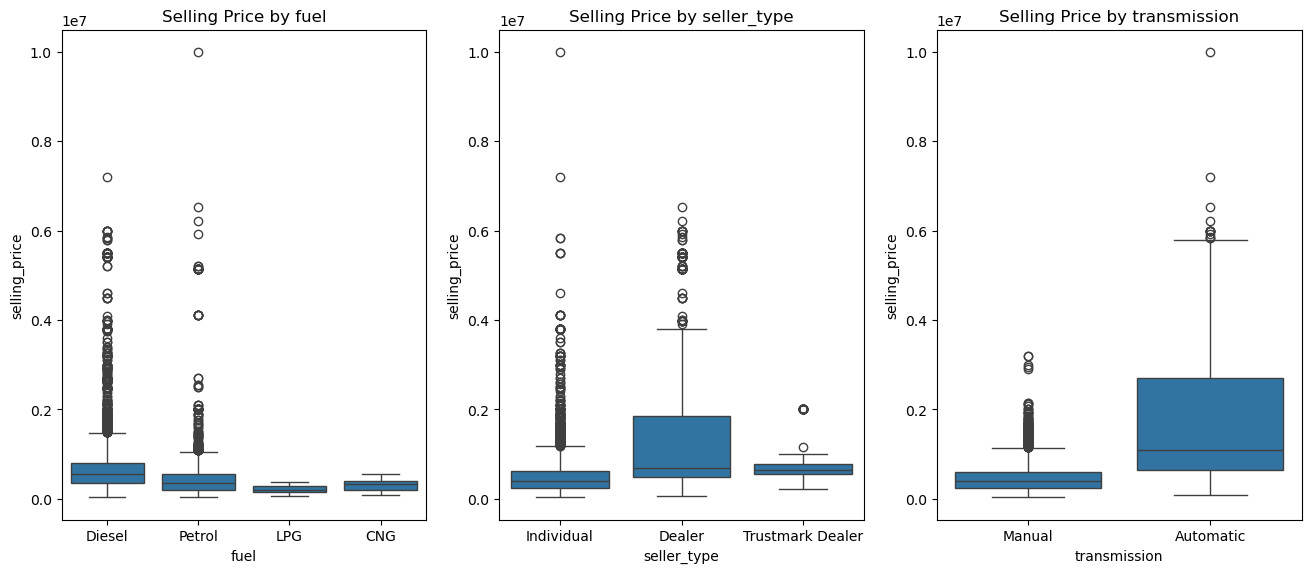

In [89]:

plt.figure(figsize=(16,14))
for i,cols in enumerate(cat_cols):
    plt.subplot(2,3,i+1)
    sns.boxplot(data=dataframe,x=cols,y='selling_price')
    plt.title(f"Selling Price by {cols}")

- Its not possiblet to display all nunique values present in name column,so again top 10 values in it should only be plotted

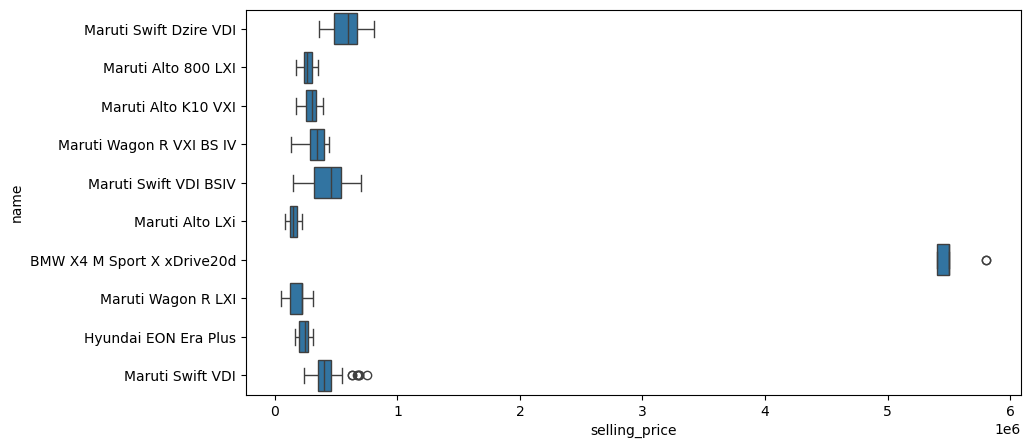

In [106]:
# plt.figure(figsize=(10,5))
top_names
# names_to_plot['name'].values
names_to_plot['name'].unique()
plt.figure(figsize=(10,5))
sns.boxplot(data=names_to_plot,y='name',x='selling_price')
plt.show()

### Now lets check corelation between respective columns

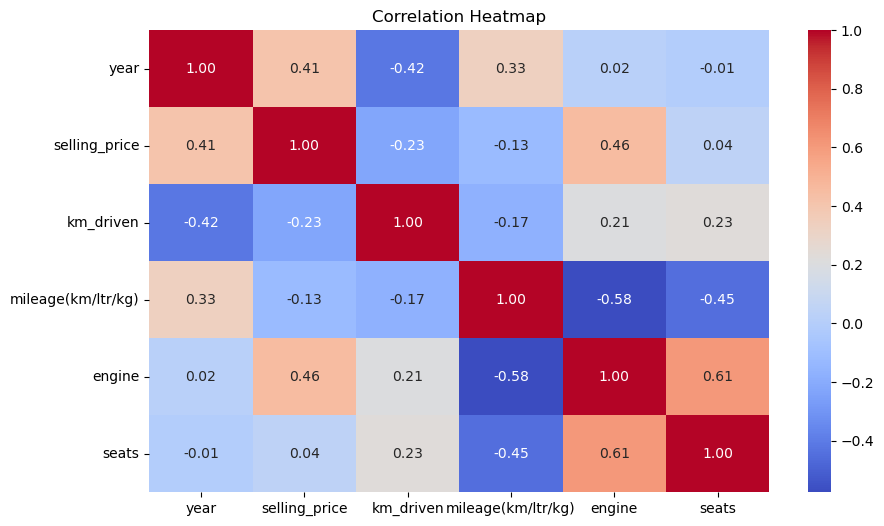

In [107]:
plt.figure(figsize=(10,6))
sns.heatmap(dataframe.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

### Now lets try to check important features only 